In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

In [21]:
results = pd.read_csv('../main/log/tie.csv', names=["algo", "experiment_id",  "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size","elite_blocks",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"])

In [26]:
results.head()

,algo,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,elite_size,elite_blocks,tie_inflate,diff_sn_inflate,size_sn_inflate,tie_deflate,diff_sn_deflate,size_sn_deflate,tie_mb_deflate,diff_sn_mb_deflate,size_sn_mb_deflate
0,SLIM*1SIG,d19cbf11-1829-11ef-9ea1-049226d8b1cb,yatch,0,0,15.497589,0.126627,1490.0,0.190000,99,100,0.00,1,100,0.0,1,100,NaN,NaN,NaN
1,SLIM*1SIG,d19cbf11-1829-11ef-9ea1-049226d8b1cb,yatch,0,1,15.032771,0.083073,1978.0,13.992104,11,2,0.09,97,100,0.0,1,100,0.0,1.0,100.0
2,SLIM*1SIG,d19cbf11-1829-11ef-9ea1-049226d8b1cb,yatch,0,2,15.032771,0.032008,1148.0,13.992104,11,2,0.09,99,100,0.0,1,100,0.0,1.0,100.0
3,SLIM*1SIG,d19cbf11-1829-11ef-9ea1-049226d8b1cb,yatch,0,3,15.032771,0.066016,1378.0,13.992104,11,2,0.20,99,100,0.0,1,100,0.0,1.0,100.0
4,SLIM*1SIG,d19cbf11-1829-11ef-9ea1-049226d8b1cb,yatch,0,4,15.032771,0.037007,1100.0,13.992104,11,2,0.12,97,100,0.0,1,100,0.0,1.0,100.0


In [27]:
results = results.query("generation != 0")

In [28]:
# results["tie_deflate"] = results["tie_deflate"]*100 / results["diff_sn_deflate"]
# results["tie_mb_deflate"] = results["tie_mb_deflate"]*100 / results["diff_sn_mb_deflate"]
# results["tie_inflate"] = results["tie_inflate"]*100 / results["diff_sn_inflate"]

In [38]:
results.algo.unique()

array(['SLIM*1SIG', 'SLIM*1NORM', 'SLIM+2SIG'], dtype=object)

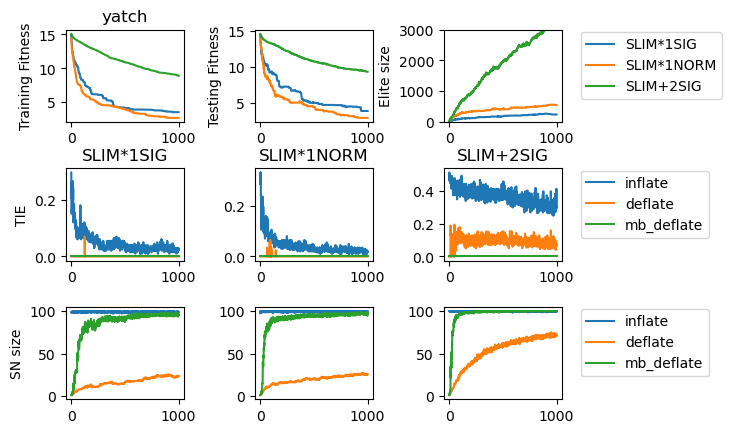

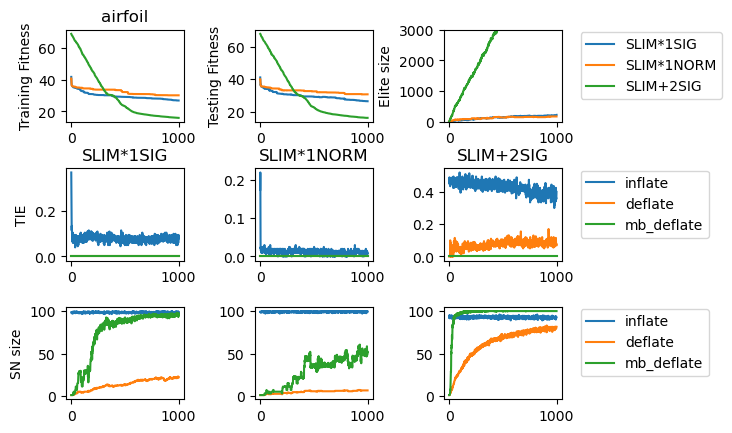

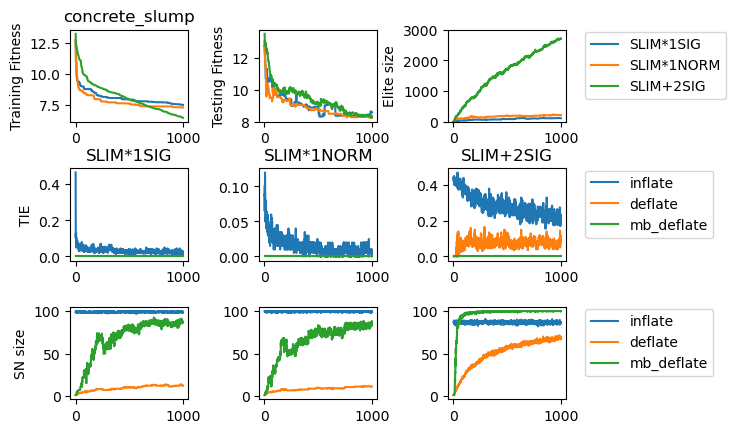

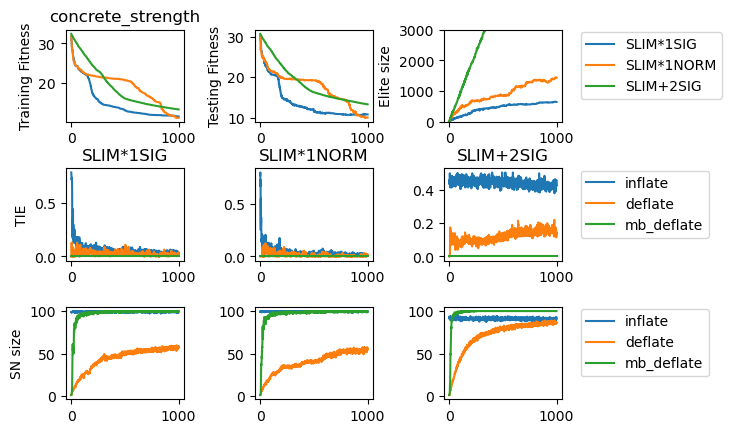

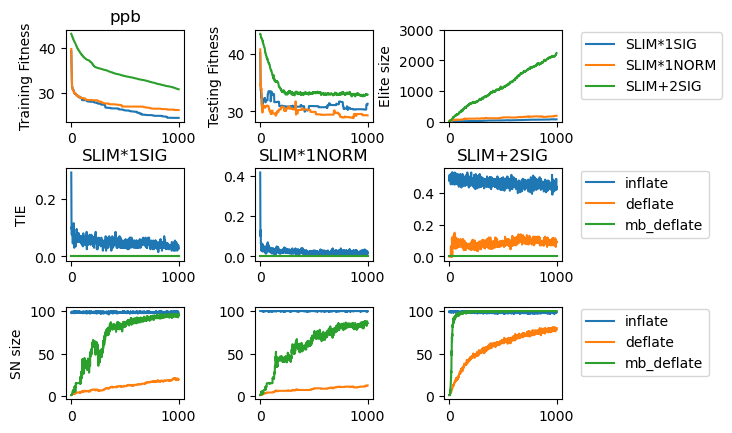

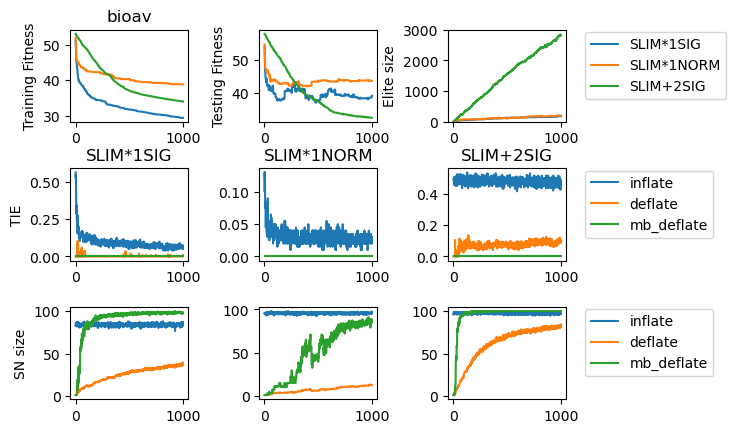

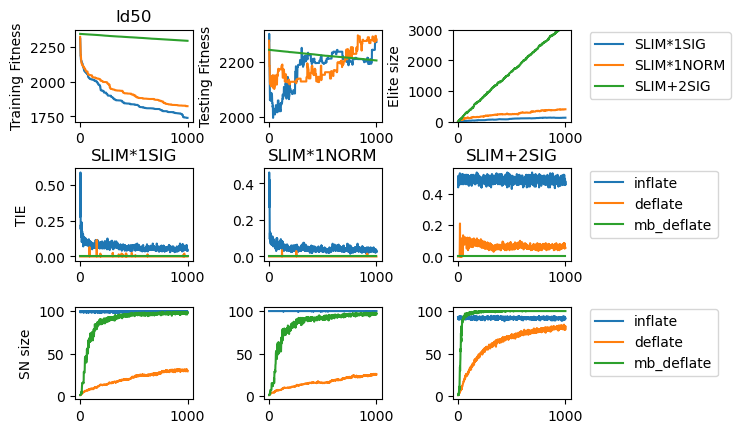

In [47]:
for data in results.dataset.unique():
    gs = gridspec.GridSpec(3, 3)
    gs.update( wspace=0.6, hspace =  0.5)
    pl.figure()
    for algo in results.algo.unique():
        
            
            grouped = results.query("algo == @algo and dataset == @data")[['generation',  "training_fitness",
                                       "test_fitness","elite_size","elite_blocks",
                                        "tie_inflate", "diff_sn_inflate", "size_sn_inflate",
                                       "tie_deflate", "diff_sn_deflate", "size_sn_deflate",
                                        "tie_mb_deflate", "diff_sn_mb_deflate", "size_sn_mb_deflate"]].groupby('generation').median()
        
        
            ax1 = pl.subplot(gs[0, 0]) 
            pl.plot(grouped.index, grouped['training_fitness'], label = algo)
            ax1.set_ylabel('Training Fitness')
            ax1.set_title(data)
    
            ax2 = pl.subplot(gs[0, 1]) 
            pl.plot(grouped.index, grouped['test_fitness'], label = algo)
            ax2.set_ylabel('Testing Fitness')


            ax3 = pl.subplot(gs[0, 2]) 
            pl.plot(grouped.index, grouped['elite_size'], label = algo)
            ax3.set_ylim(0, 3000)
            ax3.set_ylabel('Elite size')
            ax3.legend(bbox_to_anchor=(1.1, 1.05))
            
            
            if algo == 'SLIM*1SIG':
                ax4 = pl.subplot(gs[1, 0]) #1,1 
                pl.plot(grouped.index, grouped['tie_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['tie_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['tie_mb_deflate'], label = 'mb_deflate')
                ax4.set_ylabel('TIE')
                ax4.set_title(algo)
            
            if algo == 'SLIM*1NORM':
                ax5 = pl.subplot(gs[1, 1]) #1,1 
                pl.plot(grouped.index, grouped['tie_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['tie_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['tie_mb_deflate'], label = 'mb_deflate')
                ax5.set_title(algo)
            
            if algo == 'SLIM+2SIG':
                ax6 = pl.subplot(gs[1, 2]) #1,1 
                pl.plot(grouped.index, grouped['tie_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['tie_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['tie_mb_deflate'], label = 'mb_deflate')
                ax6.set_title(algo)
                ax6.legend(bbox_to_anchor=(1.1, 1.05))
                
            if algo == 'SLIM*1SIG':
                ax7 = pl.subplot(gs[2, 0]) #1,1 
                pl.plot(grouped.index, grouped['diff_sn_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['diff_sn_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['diff_sn_mb_deflate'], label = 'mb_deflate')
                ax7.set_ylabel('SN size')
#                 ax7.set_title(algo)
            
            if algo == 'SLIM*1NORM':
                ax8 = pl.subplot(gs[2, 1]) #1,1 
                pl.plot(grouped.index, grouped['diff_sn_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['diff_sn_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['diff_sn_mb_deflate'], label = 'mb_deflate')
#                 ax8.set_title(algo)
            
            if algo == 'SLIM+2SIG':
                ax9 = pl.subplot(gs[2, 2]) #1,1 
                pl.plot(grouped.index, grouped['diff_sn_inflate'], label = 'inflate')
                pl.plot(grouped.index, grouped['diff_sn_deflate'], label = 'deflate')
                pl.plot(grouped.index, grouped['diff_sn_mb_deflate'], label = 'mb_deflate')
#                 ax9.set_title(algo)
                ax9.legend(bbox_to_anchor=(1.1, 1.05))
            



#     plt.tight_layout()
    plt.show()